In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# Dengue Fever Prediction

File list:
* dengue_features_train.csv
* dengue_features_test.csv
* dengue_labels_train.csv

## Reading files

In [2]:
sub_format = pd.read_csv('submission_format.csv')
sub_format.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [3]:
test_df = pd.read_csv('dengue_features_test.csv')
print(test_df.shape)
test_df.head()

(416, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [4]:
test_df.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [5]:
train_df = pd.read_csv('dengue_features_train.csv')
print(train_df.shape)
train_df.head()

(1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [6]:
train_df.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [7]:
train_df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

In [8]:
train_label = pd.read_csv('dengue_labels_train.csv')
print(train_label.shape)
print(train_label.isnull().sum())
train_label.head()

(1456, 4)
city           0
year           0
weekofyear     0
total_cases    0
dtype: int64


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


## EDA

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_df.drop(['city', 'year', 'week_start_date'], axis=1), 
                                                    train_label['total_cases'], test_size=0.2)

### Y labels

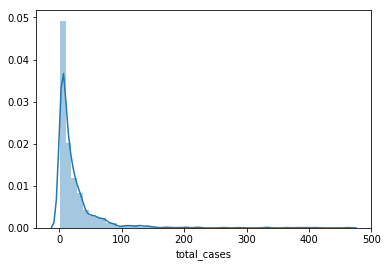

In [10]:
sns.distplot(y_train+1, bins=50)
plt.show()

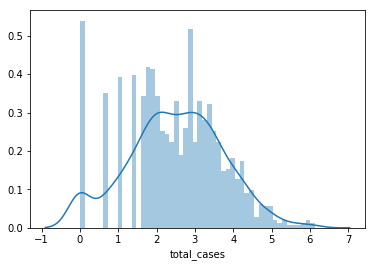

In [11]:
sns.distplot(np.log(y_train+1), bins=50)
plt.show()

In [12]:
from scipy.stats import normaltest
normaltest(np.log(y_train+1))

NormaltestResult(statistic=3.8620602238858943, pvalue=0.1449987565750307)

Fail to reject null. Sample is effectively normally distributed.

In [13]:
y_train_log = np.log(y_train+1)
y_test_log = np.log(y_test+1)

### X variables

In [14]:
x_train = x_train.apply(lambda x: x.fillna(x.median()))
x_test = x_test.apply(lambda x: x.fillna(x.median()))

## Model

In [32]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [3, 5, 7, 9], 
         'min_samples_split': [0.025, 0.05, 0.1, 0.2]}

model = RandomForestRegressor(n_estimators=200, max_depth=3)


grid = GridSearchCV(model, params, cv=3, scoring='neg_mean_absolute_error', return_train_score=True)

grid.fit(x_train, y_train_log)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_samples_split': [0.025, 0.05, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=0)

In [33]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.674947,0.028059,0.014333,9.472146e-04,3,0.025,"{'max_depth': 3, 'min_samples_split': 0.025}",-0.697927,-0.737186,-0.732942,-0.722685,0.017592,10,-0.697164,-0.677047,-0.675935,-0.683382,0.009756
1,0.626643,0.009411,0.013319,4.762802e-04,3,0.05,"{'max_depth': 3, 'min_samples_split': 0.05}",-0.700203,-0.738083,-0.730829,-0.723038,0.016417,11,-0.697218,-0.677145,-0.677316,-0.683893,0.009422
2,0.578337,0.010123,0.013652,9.476159e-04,3,0.1,"{'max_depth': 3, 'min_samples_split': 0.1}",-0.699454,-0.738306,-0.731798,-0.723186,0.016990,12,-0.700947,-0.678886,-0.682406,-0.687413,0.009677
3,0.505718,0.019813,0.012992,4.899036e-07,3,0.2,"{'max_depth': 3, 'min_samples_split': 0.2}",-0.703078,-0.749347,-0.733311,-0.728579,0.019183,13,-0.725331,-0.703346,-0.710895,-0.713190,0.009121
4,0.854512,0.004543,0.015658,9.577289e-04,5,0.025,"{'max_depth': 5, 'min_samples_split': 0.025}",-0.696402,-0.719409,-0.736509,-0.717440,0.016433,5,-0.605963,-0.587200,-0.576746,-0.589969,0.012088
5,0.842179,0.025509,0.015664,9.378848e-04,5,0.05,"{'max_depth': 5, 'min_samples_split': 0.05}",-0.696846,-0.721551,-0.739707,-0.719368,0.017566,9,-0.624897,-0.606943,-0.599173,-0.610338,0.010773
6,0.726905,0.002483,0.017004,2.456715e-03,5,0.1,"{'max_depth': 5, 'min_samples_split': 0.1}",-0.694673,-0.727226,-0.734803,-0.718901,0.017409,8,-0.658052,-0.647096,-0.642603,-0.649250,0.006488
7,0.512375,0.018629,0.013659,9.423473e-04,5,0.2,"{'max_depth': 5, 'min_samples_split': 0.2}",-0.701773,-0.750547,-0.733722,-0.728681,0.020228,15,-0.724352,-0.703654,-0.710477,-0.712828,0.008612
8,1.045076,0.015999,0.017990,2.159097e-03,7,0.025,"{'max_depth': 7, 'min_samples_split': 0.025}",-0.690550,-0.714499,-0.735500,-0.713516,0.018364,3,-0.536004,-0.516143,-0.508377,-0.520175,0.011633
9,0.951464,0.014974,0.015984,8.169754e-04,7,0.05,"{'max_depth': 7, 'min_samples_split': 0.05}",-0.692956,-0.718360,-0.735310,-0.715542,0.017406,4,-0.584320,-0.568471,-0.566306,-0.573032,0.008030


In [34]:
grid.best_params_

{'max_depth': 9, 'min_samples_split': 0.025}

In [36]:
from sklearn.metrics import mean_absolute_error

y_train_pred = np.exp(grid.predict(x_train))-1
y_test_pred = np.exp(grid.predict(x_test))-1
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

12.639113028963457
17.4886604723013


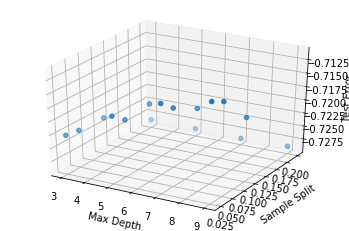

In [37]:
from mpl_toolkits import mplot3d

ax = plt.axes(projection='3d')
ax.scatter3D(grid.cv_results_['param_max_depth'], grid.cv_results_['param_min_samples_split'], grid.cv_results_['mean_test_score'])
ax.set_xlabel('Max Depth')
ax.set_ylabel('Sample Split')
plt.yticks(rotation=-10, ha='right')
ax.set_zlabel('Test Error')
plt.show()